In [1]:
import xaquacrop as xa
import xarray as xr
import xsimlab as xs

from rasterio.enums import Resampling

from pathlib import Path

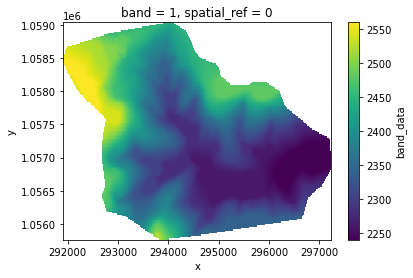

In [2]:
likeraster = xr.load_dataset(Path("../tests/download/files/sample_dem.tif"),engine="rasterio")
likeraster.band_data.plot()

In [3]:
# sd = xa.download.SoilDownloadISRIC()

In [4]:
cube = xa.download.get_cube(maptype="phh2o",bounds=likeraster.rio.reproject(xa.download.WCRS).rio.bounds(),depths="all")

connecting to isric wcs for:  phh2o
successfully connected to ISRIC for:  phh2o


In [5]:
xa.download.get_cubes_like(likeraster)

connecting to isric wcs for:  bdod
connecting to isric wcs for:  cec
connecting to isric wcs for:  cfvo
connecting to isric wcs for:  clay
connecting to isric wcs for: connecting to isric wcs for:  phh2o
 connecting to isric wcs for:  sand
nitrogen
connecting to isric wcs for:  silt
connecting to isric wcs for:  soc
connecting to isric wcs for:  ocd
successfully connected to ISRIC for:  phh2o
successfully connected to ISRIC for:  bdod
successfully connected to ISRIC for:  nitrogen
successfully connected to ISRIC for: successfully connected to ISRIC for:   soc
silt
successfully connected to ISRIC for:  ocd
successfully connected to ISRIC for:  clay
successfully connected to ISRIC for:  cec
successfully connected to ISRIC for:  cfvo
successfully connected to ISRIC for:  sand


<xarray.Dataset>
Dimensions:      (x: 266, y: 164, z: 6)
Coordinates:
  * x            (x) float64 2.919e+05 2.919e+05 ... 2.972e+05 2.972e+05
  * y            (y) float64 1.059e+06 1.059e+06 ... 1.056e+06 1.056e+06
    band         int64 1
  * z            (z) float64 2.5 10.0 22.5 45.0 80.0 150.0
    spatial_ref  int64 0
Data variables:
    bdod         (z, y, x) float32 106.0 106.0 106.0 106.0 ... 123.0 123.0 123.0
    cec          (z, y, x) float32 296.0 296.0 296.0 296.0 ... 317.0 317.0 317.0
    cfvo         (z, y, x) float32 146.0 146.0 146.0 146.0 ... 162.0 162.0 162.0
    clay         (z, y, x) float32 502.0 502.0 502.0 502.0 ... 636.0 636.0 636.0
    nitrogen     (z, y, x) float32 464.0 464.0 464.0 464.0 ... 100.0 100.0 100.0
    phh2o        (z, y, x) float32 56.0 56.0 56.0 56.0 ... 56.0 56.0 56.0 56.0
    sand         (z, y, x) float32 213.0 213.0 213.0 213.0 ... 129.0 129.0 129.0
    silt         (z, y, x) float32 285.0 285.0 285.0 285.0 ... 235.0 235.0 235.0
    soc          (z, y, x) float32 614.0 614.0 614.0 614.0 ... 68.0 68.0 68.0
    ocd          (z, y, x) float32 478.0 478.0 478.0 478.0 ... 53.0 53.0 53.0

In [6]:
cube.isel(z=0).rio.reproject(likeraster.rio.crs).rio.to_raster("phh2o_reproject.tif", dtype="float32")

In [9]:
cubes = xa.download.get_cubes_like(likeraster, maptypes=["bdod","clay","sand","silt"], resampling=Resampling.nearest, depths=["0-5","5-15"])

connecting to isric wcs for: connecting to isric wcs for:  clay
 connecting to isric wcs for:  bdod
sand
connecting to isric wcs for:  silt
successfully connected to ISRIC for:  bdod
successfully connected to ISRIC for:  clay
successfully connected to ISRIC for:  sand
successfully connected to ISRIC for:  silt


In [ ]:
# ds = xr.Dataset({mtype: cube for mtype,cube in cubes})
cubes

In [ ]:
cubes.spatial_ref.attrs

In [ ]:
cube.isel(z=0).rio.to_raster("phh2o.tif")
cubes.phh2o.isel(z=0).rio.to_raster("phh2o_cubes.tif", dtype="float32")
# xr.testing.assert_allclose( cubes.phh2o.isel(z=0),  cube.isel(z=0))

In [ ]:
ls

In [ ]:
# cube.rio.reproject(sd.likeraster.rio.crs).phh2o.plot()
# # sd.likeraster
import numpy as np
# [np.mean([int(d) for d in depth.split("-")]) for depth in sd.DEPTHS]
# coords = xr.DataArray([np.mean([int(d) for d in depth.split("-")]) for depth in sd.DEPTHS],dims="z")

In [ ]:
model = xs.Model({"sd_isric":xa.download.SoilDownloadISRIC})

In [ ]:
model.visualize()

In [ ]:
%load_ext xsimlab.ipython

In [ ]:
# %create_setup model --default --verbose
import xsimlab as xs

ds_in = xs.create_setup(
    model=model,
    clocks={"main":range(2)},
    input_vars={
        # Raster dataset to which the obtained data will be warped, clipped and resamples
        'sd_isric__likeraster': likeraster.band_data.mean(dim="band").transpose("x","y"),
        # Depths at which to retrieve data from. Default is 'all':depths
        # 0-5,5-15,15-30,30-60,60-100,100-200
        'sd_isric__depths': 'all',
        # Types of data, default is 'mean', other options are
        # 'Q0.05','Q0.5','Q0.95','uncertainty'
        'sd_isric__types': 'mean',
    },
    output_vars={}
)


In [ ]:
ds_in.rio.crs

In [ ]:
ds_in["sd_isric__likeraster"] = sd.likeraster.sel(band=1).band_data.transpose("x","y")

In [ ]:
ds_in.rio.crs

In [ ]:
sd.likeraster.rio

In [ ]:
ds_in.rio._crs

In [ ]:
ds_in.xsimlab.run(model=model)

In [ ]:
ds_in["sd_isric__likeraster"].rio.crs